In [98]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC



# Linear SVM Classification

In [58]:
# Only classifying Iris virginica (label 2)

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) 

svm_clf = make_pipeline(
  StandardScaler(),
  LinearSVC(C=1, random_state=42)
)

svm_clf.fit(X, y)

/Users/adamscarlat/miniconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [59]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [60]:
# With SVMs we can get back the distance to the decision boundary (the margin). Notice that it's not a probability
# as with Logistic Regression.
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

# Nonlinear SVM Classification

Text(0, 0.5, 'x2')

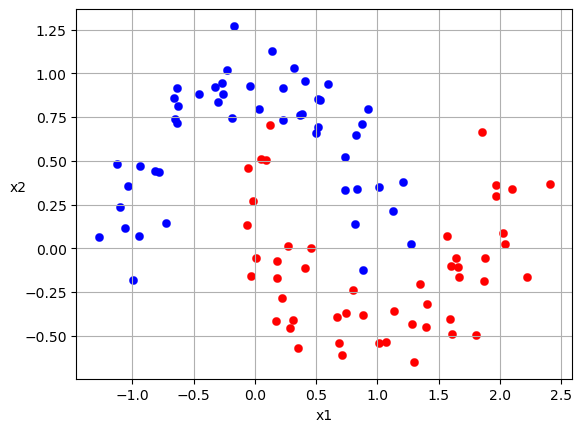

In [61]:
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

moons0 = X[y == 0]
moons1 = X[y == 1]

plt.scatter(moons0[:,0], moons0[:,1], color="blue", linewidths=0.2)
plt.scatter(moons1[:,0], moons1[:,1], color="red", linewidths=0.2)

plt.grid()
plt.xlabel("x1")
plt.ylabel("x2", rotation=0)


In [62]:
# Using polynomial features to transform the dataset to a linearly separable dataset

from sklearn.preprocessing import PolynomialFeatures


polynomial_svm_clf = make_pipeline(
  PolynomialFeatures(degree=3),
  StandardScaler(),
  LinearSVC(C=10, max_iter=10_000, random_state=42)
)

polynomial_svm_clf.fit(X, y)

/Users/adamscarlat/miniconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

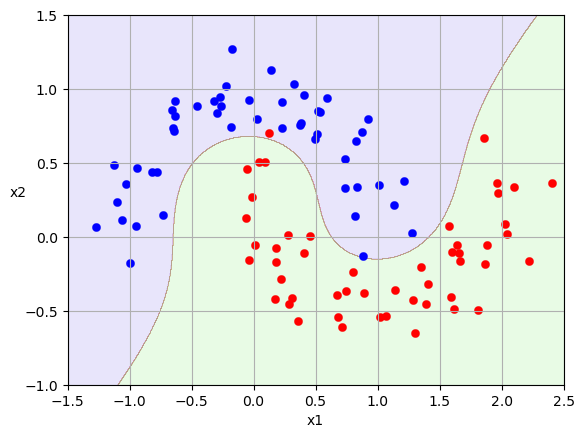

In [92]:
def visualize_moons_fit(clf):
  x1s = np.linspace(-1.5, 2.5, 1000)
  x2s = np.linspace(-1, 1.5, 1000)

  # Creates 2 2D arrays for the x1s and x2s coordinates
  x0, x1 = np.meshgrid(x1s, x2s)

  # Creates an array where each row is a coordinate from x0 and x1
  X = np.c_[x0.ravel(), x1.ravel()]

  # Make predictions on each coordinate. The reshaping of it maps each 
  # coordinate to a prediction
  y_pred = clf.predict(X).reshape(x0.shape)

  # x0 and x1 define the grid and y_pred defines the contour line.
  plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.1)

  # print (y_pred.shape)

  plt.scatter(moons0[:,0], moons0[:,1], color="blue", linewidths=0.2)
  plt.scatter(moons1[:,0], moons1[:,1], color="red", linewidths=0.2)

  plt.grid()
  plt.xlabel("x1")
  plt.ylabel("x2", rotation=0)

visualize_moons_fit(polynomial_svm_clf)

#### Polynomial Kernel (kernel trick)

In [96]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

poly_kernel_svm_clf = make_pipeline(
  StandardScaler(),
  SVC(kernel="poly", degree=10, coef0=1, C=100)
)

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100, coef0=1, degree=10, kernel='poly'))])

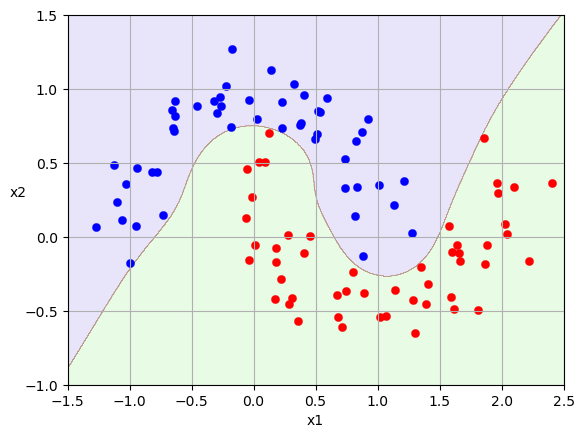

In [97]:
visualize_moons_fit(poly_kernel_svm_clf)

#### Gaussian RBF Kernel

In [99]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

rbf_kernel_svm_clf = make_pipeline(
  StandardScaler(),
  SVC(kernel="rbf", gamma=5, C=0.001)
)

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

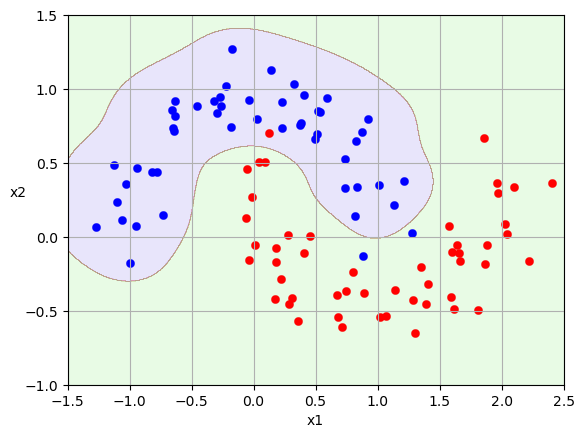

In [100]:
visualize_moons_fit(rbf_kernel_svm_clf)